In [1]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm
import re
import pdb

In [2]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.40', '1.0.1.post2')

In [3]:
torch.cuda.set_device(0)

In [4]:
!pwd

/home/jupyter/urdu/classification


In [5]:
path = Path('/home/jupyter/urdu/classification')

In [6]:
!ls

Urdu_Classification_Data_News_Headlines.csv  Urdu_Classification_Model.ipynb


In [7]:
df = pd.read_csv(path/'Urdu_Classification_Data_News_Headlines.csv')
df.tail()

,headline,label
4659,ٹینس اسٹارثانیہ مرزا ماں بن گئیں، شعیب ملک کے ...,entertainment
4660,شادی کے لئے میں سلمان خان کو منا سکتا ہوں: عام...,entertainment
4661,سوشل میڈیا یوزرس کو نہیں ہضم ہوا پرینکا ۔ نک ک...,entertainment
4662,می ٹو مہم پر شاہ رخ خان کی خاموشی پر لوگوں نے ...,entertainment
4663,جیمز بانڈ اور ایتھن ہنٹ کو ایک ہی فلم میں دیکھ...,entertainment


In [8]:
df['label'].unique()

array(['crime', 'cricket', 'entertainment'], dtype=object)

In [9]:
print('Entertainment', (df['label'] == 'entertainment').sum())
print('Sports', (df['label'] == 'crime').sum())
print('State', (df['label'] == 'cricket').sum())

Entertainment 2646
Sports 560
State 1458


In [10]:
df['headline'][0]

'نہاتی ہوئی خاتون کا ویڈیو بنا رہا تھا آئی آئی ٹی طالب علم ، موبائل میں ملے کئی فحش کلپ'

In [11]:
df.shape

(4664, 2)

In [12]:
df[df['headline'].isnull()].shape

(0, 2)

In [13]:
label_cols = list(range(1,df.shape[1]))

In [14]:
print(label_cols)

[1]


In [15]:
id_to_col = list(df.columns)

In [16]:
col_to_id = {}
for i, col in enumerate(id_to_col):
    col_to_id[col] = i

In [17]:
class UrduTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(str(path/"../urdu_lm.model"))
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [18]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../urdu_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(30000)]

In [19]:
# 30,000 is the vocab size that we chose in sentencepiece
urdu_vocab = Vocab(itos)

In [20]:
tokenizer = Tokenizer(tok_func=UrduTokenizer, lang='ur')

In [21]:
tokenizer.special_cases

['xxunk', 'xxpad', 'xxbos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep']

In [22]:
data_lm = TextDataBunch.from_csv(path=path, csv_name='Urdu_Classification_Data_News_Headlines.csv', text_cols=[0], label_cols=label_cols, tokenizer=tokenizer, vocab=urdu_vocab)

In [23]:
data_lm.save()

In [24]:
bs=48

In [25]:
data_lm = TextLMDataBunch.load(path, 'tmp', bs=bs)

In [26]:
data_lm.show_batch()

idx,text
0,▁ xx bo s ▁عمران ▁خان ▁کی ▁حلف ▁برداری ▁تقریب ▁میں ▁شریک ▁نہیں ▁ہوں ▁گے ▁عامر ▁خان ، ▁جانیں ▁کیا ▁ہے ▁وجہ ▁ xx bo s ▁بالی ▁ووڈ ▁اداکار ▁فاروق ▁شیخ ▁کو ▁سالگرہ ▁پر ▁گوگل ▁نے ▁ڈوڈ ل ▁بنا ▁کر ▁منفرد ▁انداز ▁میں ▁پیش ▁کیا ▁خراج ▁عقیدت ▁ xx bo s ▁سن چور ین ▁میں ▁دو کپ تان وں ▁کا ▁ایک ▁انوکھا ▁ریکارڈ ، ▁ٹیسٹ ▁کرکٹ ▁کی ▁تاریخ ▁میں ▁پہلی
1,▁نہیں ▁ہوگی ▁سلمان ▁خان ▁کی ▁فلم ▁ xx bo s ▁بال ▁بال ▁بچ ▁گئے ▁نمبر ▁ایک ▁گیند ▁باز ▁جس پر یت ▁بم راہ ▁ ، ▁ورلڈ ▁کپ ▁سے ▁پہلے ▁ختم ▁ہوجاتا ▁کرکٹ ▁کیریئر ▁ ! ▁۔ ▁ xx bo s ▁ملائی کہ ▁ار وڑہ ▁اور ▁ارجن ▁کپور ▁کے ▁رشتے ▁پر ▁ان ل ▁کپور ▁نے ▁توڑ ی ▁خاموشی ▁ ، ▁دیا ▁یہ ▁بڑا ▁بیان ▁ xx bo s ▁مہندر سنگھ ▁دھون
2,"s ▁اسپتال ▁میں ▁کر اہت ے ▁ہوئے ▁راکھ ی ▁ساون ت ▁نے ▁"" ▁دی ▁گریٹ ▁کھلی ▁"" ▁سے ▁مانگی ▁مدد ▁ ، ▁کہا ▁: ▁خاتون ▁ریس لر ▁کو ▁پٹ وا و ▁ xx bo s ▁ٹی -20 ▁سے ▁کی وں ▁ہوئی ▁مہندر ▁سنگھ ▁دھون ی ▁کی ▁’ چھ ٹی ‘ ؟ ▁ xx bo s ▁جنوبی ▁افریقہ ▁میں ▁پاکستان ▁کی ▁شکست ▁سے ▁پریشان ▁ہیڈ ▁کوچ ▁مکی ▁آرتھر ▁نے ▁اب ▁پچ"
3,▁ ! با ہو بلی ▁کو ▁ایک ▁بڑی ▁غلطی ▁نے ▁کرایا ▁ہٹ ؟ ▁یہ ▁غلطی ▁نہ ▁ہوتی ▁تو ▁کیا ▁کہانی ▁کا ▁پلاٹ ▁کچھ ▁اور ▁ہی ▁ہوتا ▁ xx bo s ▁ٹی ▁وی ▁کی ▁سب ▁سے ▁زیادہ ▁مقبول ▁بہو ▁سا کشی ▁ت نور ▁کس ▁طرح ▁بنیں ▁دن گل ▁میں ▁عامر ▁کی ▁بیوی ▁ xx bo s ▁پاکستان ▁کے ▁اس ▁تیز ▁گیند ▁باز ▁نے ▁کیا ▁کمال ▁ ، ▁وقار ▁یونس ▁کی ▁کرلی
4,▁عصمت ▁دری ، ▁لڑکی ▁نے ▁زہر ▁کھا ▁کر ▁دی ▁جان ▁ xx bo s ▁بیرون ▁ممالک ▁میں ▁بج تا ▁ہے ▁بالی ▁ووڈ ▁کے ▁ان ▁ستاروں ▁کا ▁ڈنک ا ▁ xx bo s ▁آئی ▁پی ▁ایل ▁2018 ▁ممبئی ▁ب قابل ہ ▁چن ئی : رو ہ ت ▁کی ▁طوفان ی ▁نصف ▁سنچری ▁سے ▁جیتی ▁ممبئی ، چن ئی ▁کو ▁8 ▁وکٹ ▁سے ▁شکست ▁ xx bo s ▁اب ▁نانا ▁پاٹ ی


In [27]:
learn = language_model_learner(data_lm, drop_mult=0.3)

In [28]:
# Loading the pretrained language model on urdu wikipedia
learn.load('/home/jupyter/urdu/UrduDataset/models/fourth-ur-lm', with_opt=True)

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (3731 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /home/jupyter/urdu/classification
x: LMTextList (3731 items)
[Text ▁ xx bo s ▁بھوپال ▁شیل ٹر ▁ہو م ▁ری پ ▁معاملہ ▁: ▁آپریٹر ▁کی ▁درند گی ▁سے ▁تین ▁بچی وں ▁کی ▁ہوئی ▁موت, Text ▁ xx bo s ▁دہلی ▁: ▁گر ل ▁فری نڈ ▁دوسرے ▁لڑکی ▁سے ▁بڑھا ▁رہی ▁تھی ▁دوستی ▁ ، ▁بوائے ▁فری نڈ ▁نے ▁کردی ▁یہ ▁وحشی انہ ▁حرکت, Text ▁ xx bo s ▁موبائل ▁پر ▁رات ▁بھر ▁ویڈیوز ▁دیکھ ▁رہی ▁تھی ▁بیوی ▁ ، ▁شوہر ▁نے ▁اٹھایا ▁یہ ▁خوفناک ▁قدم ▁ ، ▁جان ▁کر ▁اڑ ج ائیں ▁گے ▁ہوش, Text ▁ xx bo s ▁ور اٹ ▁کو ہلی ▁نے ▁پورے ▁کئے ▁1 0،000 ▁رن ▁تو بیو ی ▁انوش کا ▁شرما نے ▁سوشل ▁میڈیا ▁پر کہ ہ ▁دیا ▁یہ ▁ xx re p ▁7 ▁۔, Text ▁ xx bo s ▁ رنبیر ▁کپور ▁سے ▁عالیہ ▁بھٹ ▁کے ▁رشتہ ▁کو ▁لے ▁کر ▁مہیش ▁بھٹ ▁نے ▁کہ ی ▁یہ ▁بڑی ▁بات]...
Path: /home/jupyter/urdu/classification;

Valid: LabelList
y: LMLabel (933 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /home/jupyter/urdu/c

In [29]:
# Fine tuning the prtrained LM on current dataset

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


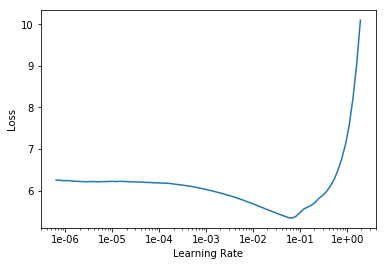

In [31]:
learn.recorder.plot()

In [32]:
learn.freeze()

In [33]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,5.432653,4.942446,0.268112


In [34]:
learn.save('fit_head', with_opt=True)

In [35]:
learn.load('fit_head', with_opt=True);

In [36]:
learn.unfreeze()

In [37]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.773733,4.732935,0.284779
2,4.578322,4.403563,0.314484
3,4.329726,4.143337,0.346117
4,4.081027,4.009856,0.362514
5,3.843485,3.927437,0.374546
6,3.629328,3.887037,0.378416
7,3.441375,3.873877,0.382724
8,3.288971,3.868453,0.384963
9,3.181379,3.872345,0.386791
10,3.105652,3.872959,0.386281


In [38]:
learn.save('fine_tuned', with_opt=True)

In [39]:
learn.load('fine_tuned', with_opt=True);

In [42]:
learn.predict('سرحدی علاقے میں فوجی',n_words=10)

'سرحدی علاقے میں فوجی ▁ماسکو ، ▁قتل ▁کے ▁بعد ▁مگر ▁امداد ▁او ▁ مبا'

In [43]:
learn.save_encoder('fine_tuned_enc')

In [45]:
data_clas = TextClasDataBunch.from_csv(path=path, csv_name='Urdu_Classification_Data_News_Headlines.csv', tokenizer=tokenizer, vocab=urdu_vocab, text_cols=[0], label_cols=label_cols)

In [46]:
data_clas.show_batch()

text,target
▁ xx bo s ▁اذان ▁سے ▁متعلق ▁ٹو یٹ ▁پر ▁چو طرف ہ ▁تنقید ▁کے ▁بعد ▁سو نو ▁ نگ م ▁نے ▁دی ▁صفائی ▁ ، ▁کسی ▁کو ▁لگتا ▁ہے ▁کہ ▁پیغمبر ▁اسلام ▁کی ▁تنقید ▁کی ▁ ، ▁تو ▁میں ▁معافی ▁چاہتا ▁ہوں,entertainment
▁ xx bo s ▁آئی ▁پی ▁ایل ▁2019 ▁: ▁99 ▁رن ▁بنانے ▁کے ▁باوجود ▁کر س ▁گیل ▁پر ▁اٹھا ▁سوال ▁ ، ▁سابق ▁کرکٹر ▁نے ▁کہا ▁: ▁ایسے ▁ بلے ▁بازوں ▁کو ▁کی وں ▁کھیل نے ▁دیا ▁جاتا ▁ہے ▁ ؟,cricket
▁ xx bo s ▁آئی ▁پی ▁ایل ▁2019 ▁: ▁47 ▁سال ▁کے ▁مر لی ▁دھر ن ▁کو ▁20 ▁سال ▁کے ▁راشد ▁خان ▁نے ▁دیا ▁چیلنج ▁ ، ▁پھر ▁ہوا ▁کچھ ▁ایسا ▁کہ ▁سب ▁رہ ▁گئے ▁حیران ▁ ! ۔,cricket
▁ xx bo s ▁شاہد ▁آفریدی ▁کا ▁دھ ماک ہ ▁ ، ▁17 ▁گیند وں ▁میں ▁بنا ▁ڈالے ▁59 ▁رن ▁ ، ▁لگائے ▁7 ▁چھ کے ▁ ، ▁اس ▁پاکستانی ▁گیند ▁باز ▁کی ▁جم ▁کر ▁کی ▁دھن ائی,cricket
"▁ xx bo s ▁دھون ی ▁کی ▁گالی ▁کا ▁ہوتا ▁ہے ▁"" اثر "" ▁ ، ▁ایک ▁کھلاڑی ▁ہوچکا ▁ہے ▁ٹیم ▁انڈیا ▁سے ▁باہر ▁ ، ▁اب ▁تیز ▁گیند ▁باز ▁خلیل ▁احمد ▁کا ▁کیا ▁ہوگا ▁ ؟",cricket


In [47]:
data_clas.sanity_check()

In [48]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)

In [49]:
learn.load_encoder('fine_tuned_enc')

In [50]:
learn.freeze()

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


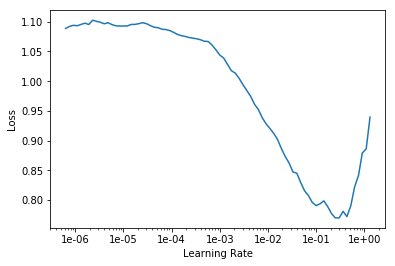

In [52]:
learn.recorder.plot()

In [53]:
learn.loss_func.func

CrossEntropyLoss()

In [54]:
kappa = KappaScore()

In [55]:
learn.metrics = [kappa, accuracy]

In [56]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,kappa_score,accuracy
1,0.494641,0.265806,0.826078,0.904609


In [57]:
learn.save('first-full')

In [58]:
learn.load('first-full');

In [59]:
learn.freeze_to(-2)
learn.fit_one_cycle(5, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,kappa_score,accuracy
1,0.365159,0.223123,0.877966,0.931404
2,0.316919,0.196533,0.886195,0.935691
3,0.265647,0.189031,0.883296,0.934619
4,0.209994,0.169795,0.900221,0.944266
5,0.163528,0.169292,0.898201,0.943194


In [60]:
learn.save('final')

In [63]:
learn.predict('شاکنگ ایکسپریس وے میں خواتین کوچा')

(Category crime, tensor(1), tensor([0.0133, 0.9458, 0.0409]))

In [65]:
learn.predict("ایک موٹی بریک پر انسان کو چوروں میں موٹر سائیکل کھو دیتا ہے")

(Category crime, tensor(1), tensor([1.1423e-04, 9.7858e-01, 2.1310e-02]))

In [61]:
learn.predict("کیا سلمان نے اپنا اپنا چینل بنایا؟")

(Category entertainment, tensor(2), tensor([0.0062, 0.0024, 0.9915]))

In [62]:
learn.predict("ڈھاما کیڈر! یہ ٹیم بھارت کے لئے بہترین کارکردگی ہےी")

(Category cricket, tensor(0), tensor([0.9468, 0.0017, 0.0515]))